## **CleanCarScore**

Part I - Exploratory Data Analysis

Part II - ML  - Predictive Modeling

*** PART I - EXPLORATORY DATA ANALYSIS ***

In [ ]:

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df=pd.read_csv('CO2 Emissions_Canada 2.csv')
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(7385, 12)

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [ ]:
# Renaming

df['Fuel Type'] = df['Fuel Type'].str.replace('Z', 'pr_gas')
df['Fuel Type'] = df['Fuel Type'].str.replace('X', 'reg_gas')
df['Fuel Type'] = df['Fuel Type'].str.replace('D', 'diesel')
df['Fuel Type'] = df['Fuel Type'].str.replace('N', 'nat_gas')
df['Fuel Type'] = df['Fuel Type'].str.replace('E', 'ethanol')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,pr_gas,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,pr_gas,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,pr_gas,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,pr_gas,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,pr_gas,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,pr_gas,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,pr_gas,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,pr_gas,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,pr_gas,11.2,8.3,9.9,29,232


In [ ]:
unique_Makes = df['Make'].unique()
unique_Makes

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [ ]:
GM = df[df['Make'].isin(['CHEVROLET', 'GMC', 'BUICK', 'CADILLAC'])]
GM

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
140,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,A6,reg_gas,14.3,9.9,12.3,23,283
141,BUICK,ENCLAVE AWD,SUV - STANDARD,3.6,6,A6,reg_gas,14.6,10.2,12.6,22,290
142,BUICK,ENCORE,SUV - SMALL,1.4,4,AS6,reg_gas,9.5,7.2,8.5,33,196
143,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,AS6,reg_gas,10.2,8.0,9.2,31,212
144,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,reg_gas,13.7,8.7,11.5,25,264
...,...,...,...,...,...,...,...,...,...,...,...,...
6899,GMC,Yukon XL FFV,SUV - STANDARD,5.3,8,A6,ethanol,21.2,13.9,17.9,16,298
6900,GMC,Yukon XL 4WD,SUV - STANDARD,5.3,8,A6,reg_gas,16.8,11.3,14.4,20,337
6901,GMC,Yukon XL 4WD FFV,SUV - STANDARD,5.3,8,A6,reg_gas,16.8,11.3,14.4,20,337
6902,GMC,Yukon XL 4WD FFV,SUV - STANDARD,5.3,8,A6,ethanol,22.2,15.3,19.1,15,319


In [ ]:
GM = GM[['Make','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
GM = GM.reset_index(drop=True)
GM

,Make,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,BUICK,23,283
1,BUICK,22,290
2,BUICK,33,196
3,BUICK,31,212
4,BUICK,25,264
...,...,...,...
1172,GMC,16,298
1173,GMC,20,337
1174,GMC,20,337
1175,GMC,15,319


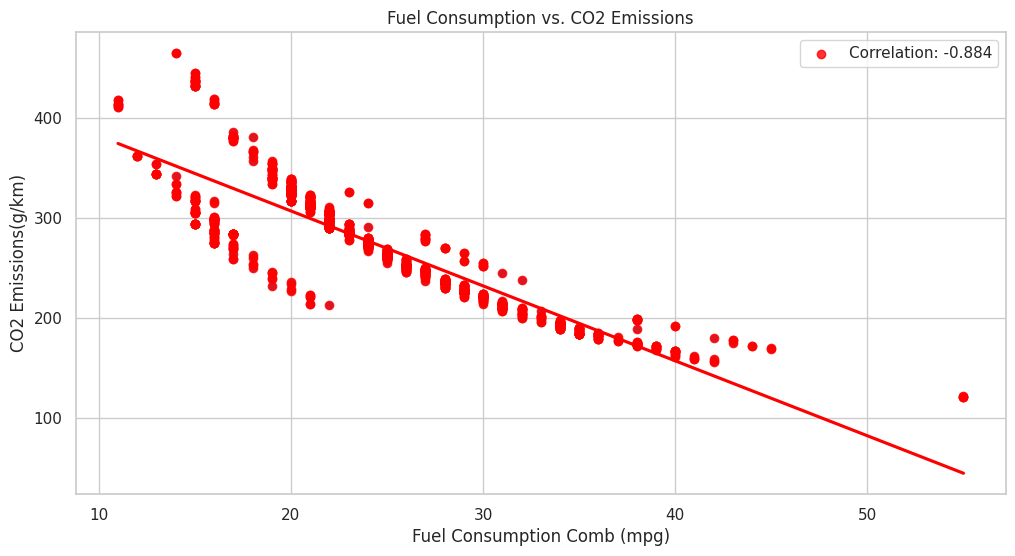

In [ ]:
# Scatter Plot with Regression Line using GM cars data

x = GM['Fuel Consumption Comb (mpg)']
y = GM['CO2 Emissions(g/km)']

# Calculating the correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]

# Creating scatter plot with a regression line
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y,ci=None,label=f'Correlation: {correlation:.3f}', color='red')
plt.title('Fuel Consumption vs. CO2 Emissions')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions(g/km)')
plt.legend()
plt.show()


Correlation coefficient between Fuel Consumption and CO2 Emissions: -0.884

The lower the mpg, the higher the CO2 emission --> STRONG negative CORRELATION

In [ ]:
# Grouping by "Fuel Type" and applying aggregation functions
fuel_type_grouped = df.groupby('Fuel Type').agg({
    'Engine Size(L)': 'mean',
    'Cylinders': 'mean',
    'CO2 Emissions(g/km)': 'mean'
})

# Renaming the columns
fuel_type_grouped.rename(columns={
    'Engine Size(L)': 'Average Engine Size (L)',
    'Cylinders': 'Average Cylinders',
    'CO2 Emissions(g/km)': 'Average CO2 Emissions (g/km)'
}, inplace=True)


FT=fuel_type_grouped.sort_values(by='Average CO2 Emissions (g/km)', ascending=False)

FT



,Average Engine Size (L),Average Cylinders,Average CO2 Emissions (g/km)
Fuel Type,,,
ethanol,4.131892,6.556757,275.091892
pr_gas,3.448470,6.194878,266.043410
diesel,2.568571,4.982857,237.548571
reg_gas,2.835634,5.039043,235.119329
nat_gas,3.600000,6.000000,213.000000


In [ ]:
fuel_type_counts = df['Fuel Type'].value_counts()
fuel_type_counts

reg_gas    3637
pr_gas     3202
ethanol     370
diesel      175
nat_gas       1
Name: Fuel Type, dtype: int64

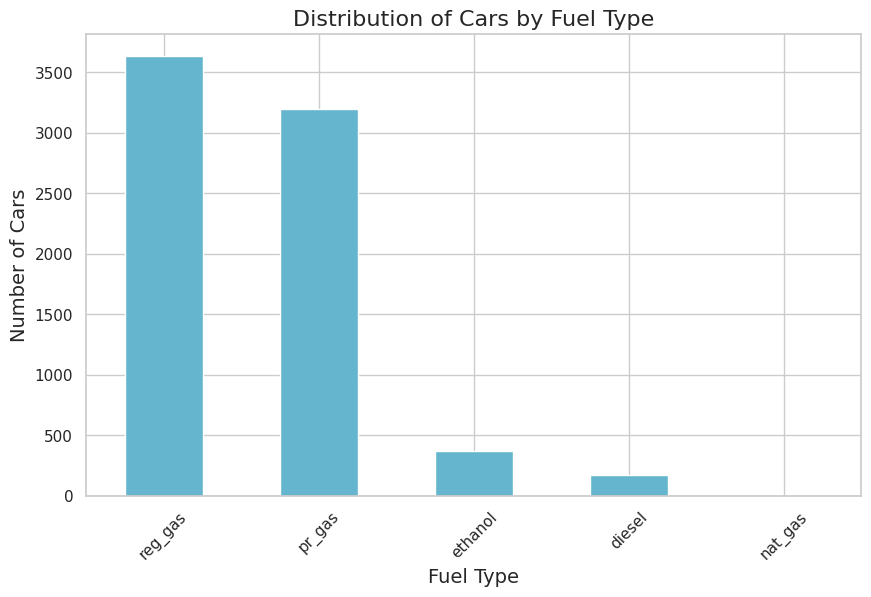

In [ ]:
# Grouping  by "Fuel Type" and counting the number of cars in each group
fuel_type_counts = df['Fuel Type'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
fuel_type_counts.plot(kind='bar', color='c')
plt.title('Distribution of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)


plt.show()

In [ ]:
#Top 10 poluters

n=10
highest_CO2_emissions = df.nlargest(n, 'CO2 Emissions(g/km)')
highest_CO2_emissions

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,pr_gas,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,pr_gas,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,pr_gas,26.8,16.6,22.2,13,522
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,pr_gas,26.6,15.8,21.7,13,493
7059,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,pr_gas,26.6,15.8,21.7,13,493
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,reg_gas,23.9,17.8,21.2,13,488
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM7,pr_gas,26.3,15.6,21.5,13,487
7058,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM7,pr_gas,26.2,15.5,21.4,13,485
2971,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,AS7,pr_gas,24.3,17.9,21.4,13,476
5126,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,A7,pr_gas,22.2,18.0,20.3,14,473


In [ ]:
#Lowest 10 - cleanest cars

n=10
lowest_CO2_emissions = df.nsmallest(n, 'CO2 Emissions(g/km)')
lowest_CO2_emissions

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,reg_gas,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,reg_gas,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,reg_gas,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,reg_gas,4.2,4.0,4.1,69,96
6949,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,reg_gas,4.2,4.2,4.2,67,99
4899,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,reg_gas,4.3,4.4,4.3,66,102
3823,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,reg_gas,4.3,4.4,4.4,64,103
3229,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,reg_gas,4.4,4.6,4.5,63,104
5930,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,reg_gas,4.3,4.4,4.3,66,104
4297,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,reg_gas,4.4,4.6,4.5,63,105


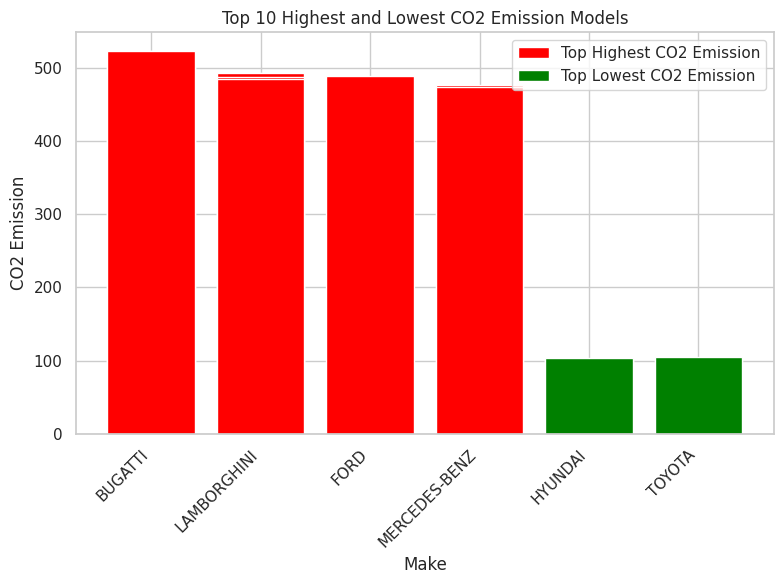

In [ ]:

n = 10

# top n highest and lowest
highest_CO2_emission = df.nlargest(n, 'CO2 Emissions(g/km)')
lowest_CO2_emission = df.nsmallest(n, 'CO2 Emissions(g/km)')

# creating a bar plot
plt.figure(figsize=(8, 6))

plt.bar(highest_CO2_emission['Make'], highest_CO2_emission['CO2 Emissions(g/km)'], color='red', label='Top Highest CO2 Emission')
plt.bar(lowest_CO2_emission['Make'], lowest_CO2_emission['CO2 Emissions(g/km)'], color='green', label='Top Lowest CO2 Emission')

plt.xlabel('Make')
plt.ylabel('CO2 Emission')
plt.title(f'Top {n} Highest and Lowest CO2 Emission Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

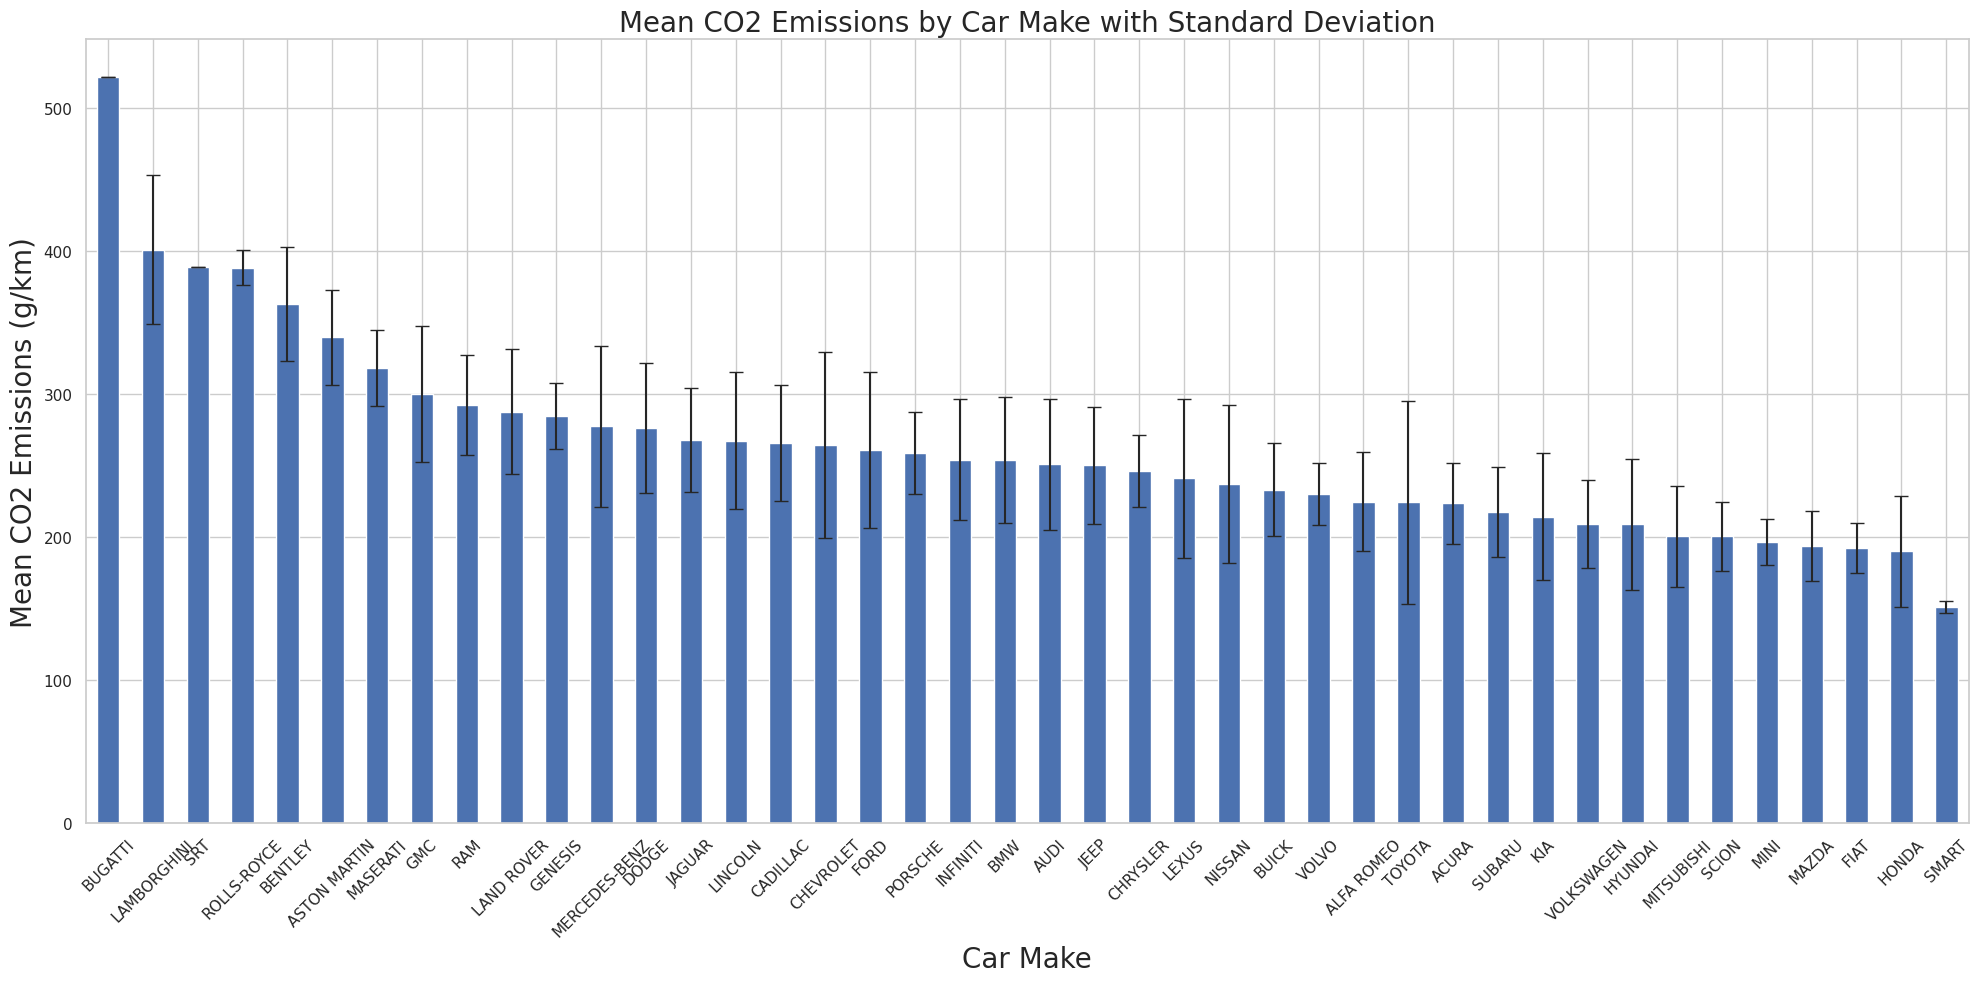

In [ ]:
# Grouping by 'Make' and calculating mean and SD of CO2 emissions
grouped = df.groupby('Make')['CO2 Emissions(g/km)'].agg(['mean', 'std'])

# Sorting the grouped data by mean CO2 emissions in descending order
grouped = grouped.sort_values(by='mean', ascending=False)

# Creating a bar chart with error bars
plt.figure(figsize=(20, 10))
grouped['mean'].plot(kind='bar', yerr=grouped['std'], capsize=5)
plt.title('Mean CO2 Emissions by Car Make with Standard Deviation',fontsize=20)
plt.ylabel('Mean CO2 Emissions (g/km)', fontsize=20)
plt.xlabel('Car Make', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
#binning - categorizing vehicles based on the environmental impact


bins = [0, 100, 250, 400, 550]
labels = ['low', 'medium', 'high', 'very high']
df['CO2_emissions(g/km)_bins'] = pd.cut(df['CO2 Emissions(g/km)'], bins=bins, labels=labels)


df.head(5)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2_emissions(g/km)_bins
0,ACURA,ILX,COMPACT,2.0,4,AS5,pr_gas,9.9,6.7,8.5,33,196,medium
1,ACURA,ILX,COMPACT,2.4,4,M6,pr_gas,11.2,7.7,9.6,29,221,medium
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,pr_gas,6.0,5.8,5.9,48,136,medium
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,pr_gas,12.7,9.1,11.1,25,255,high
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,pr_gas,12.1,8.7,10.6,27,244,medium


In [ ]:
# Counting the occurrences of each bin
bin_counts = df['CO2_emissions(g/km)_bins'].value_counts()

bin_counts

medium       3912
high         3370
very high      98
low             5
Name: CO2_emissions(g/km)_bins, dtype: int64

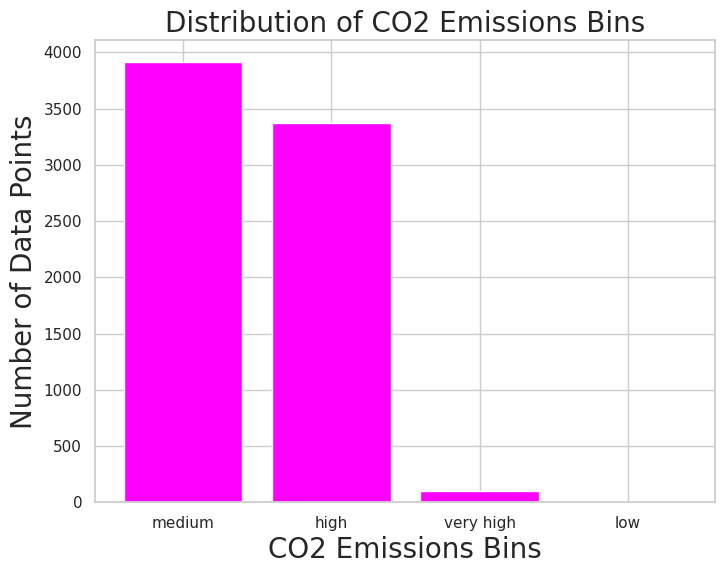

In [ ]:
# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color='magenta')
plt.xlabel('CO2 Emissions Bins',fontsize=20)
plt.ylabel('Number of Data Points',fontsize=20)
plt.title('Distribution of CO2 Emissions Bins', fontsize=20)

plt.show()

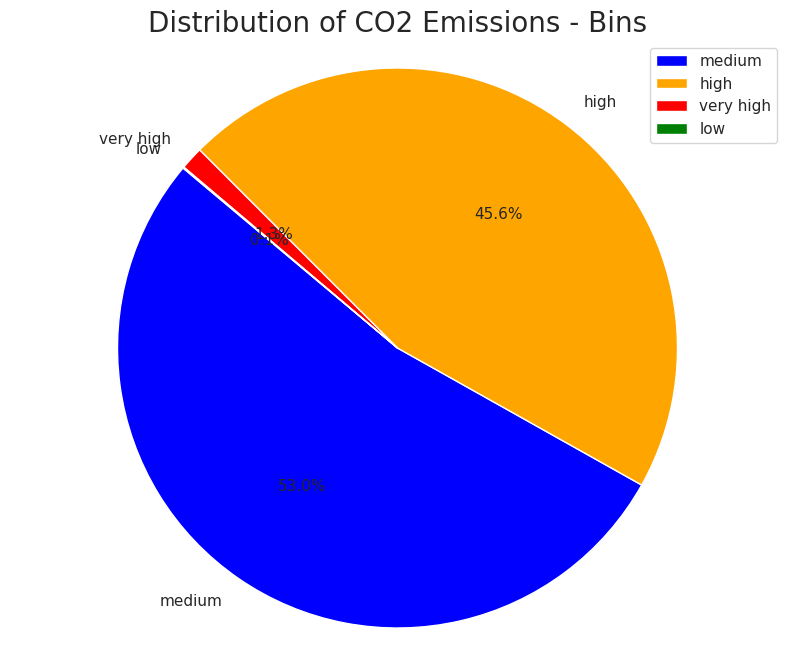

In [ ]:
#Creating a pie chart
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'red', 'green']
plt.pie(bin_counts, labels=bin_counts.index, colors=colors, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 11})
plt.axis('equal')
plt.title('Distribution of CO2 Emissions - Bins', fontsize=20)
plt.legend()
plt.show()


 * PART II - ML - PREDICTIVE MODELING *

In [ ]:
# Performing one-hot encoding for categorical variables

df_encoded = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'])
df_encoded

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),CO2_emissions(g/km)_bins,Make_ACURA,Make_ALFA ROMEO,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_diesel,Fuel Type_ethanol,Fuel Type_nat_gas,Fuel Type_pr_gas,Fuel Type_reg_gas
0,2.0,4,9.9,6.7,8.5,33,196,medium,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2.4,4,11.2,7.7,9.6,29,221,medium,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.5,4,6.0,5.8,5.9,48,136,medium,1,0,...,1,0,0,0,0,0,0,0,1,0
3,3.5,6,12.7,9.1,11.1,25,255,high,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3.5,6,12.1,8.7,10.6,27,244,medium,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,medium,0,0,...,0,0,0,0,0,0,0,0,1,0
7381,2.0,4,11.2,8.3,9.9,29,232,medium,0,0,...,0,0,0,0,0,0,0,0,1,0
7382,2.0,4,11.7,8.6,10.3,27,240,medium,0,0,...,0,0,0,0,0,0,0,0,1,0
7383,2.0,4,11.2,8.3,9.9,29,232,medium,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# dropping column

df_encoded=df_encoded.drop(['CO2_emissions(g/km)_bins'],axis=1)
df_encoded.head(2)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_diesel,Fuel Type_ethanol,Fuel Type_nat_gas,Fuel Type_pr_gas,Fuel Type_reg_gas
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Creating model to predict CO2 Emissions

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Data preprocessing
X = df_encoded.drop(['CO2 Emissions(g/km)'], axis=1) # Feature matrix (excluding target)
y = df_encoded['CO2 Emissions(g/km)']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# n_estimators=100 (model will consist of 100 decision trees)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculating Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

Random Forest Mean Squared Error: 12.254970912350599


In [ ]:
CO2_emissions= df['CO2 Emissions(g/km)']

min = CO2_emissions.min()
max = CO2_emissions.max()

CO2_emissions_range = max - min

print("Minimum CO2 Emissions:", min)
print("Maximum CO2 Emissions:", max)
print("Range of CO2 Emissions:", CO2_emissions_range)

Minimum CO2 Emissions: 96
Maximum CO2 Emissions: 522
Range of CO2 Emissions: 426


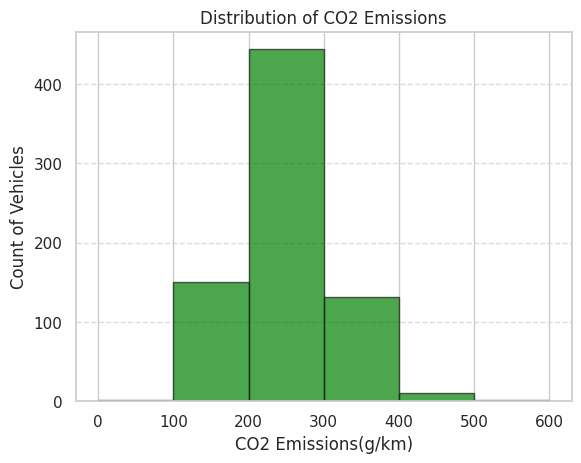

In [ ]:
O2_emissions= df['CO2 Emissions(g/km)']

bins = [0, 100, 200, 300, 400, 500, 600]

# Creating the histogram
plt.hist(CO2_emissions, bins=bins, edgecolor='k', color='green',alpha=0.7)

plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Count of Vehicles')
plt.title('Distribution of CO2 Emissions')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

Since the range of CO2 emissions is 96 to 522,  RF  Mean Squared Error of 12.25 is relatively small. MSE measures the average squared difference between the predicted and actual CO2 emissions values. This suggests that the model is making predictions that are reasonably close to the actual values.

Random Forest Regression Model is perfroming well in terms of prediction accuracy based on MSE value.
Different ML models were explored (SVM -Support Vector Machine and Linear Regression). Random Forest performed better w/ lower MSE.

Grid Search was performed to find the best hyperparameters for RF model.

In [ ]:
#New data

NEW_data=pd.read_csv('NEW_data.csv')
NEW_data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_diesel,Fuel Type_ethanol,Fuel Type_nat_gas,Fuel Type_pr_gas,Fuel Type_reg_gas
0,2.0,4,9.9,6.7,8.5,33,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.4,4,11.2,8.1,9.8,29,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2.0,4,9.9,7.4,8.8,32,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,3.0,6,9.8,6.2,8.1,35,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.0,6,12.9,9.2,11.2,25,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2.5,4,6.6,6.8,6.7,42,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
735,3.5,6,13.4,9.6,11.7,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
736,2.0,4,11.5,8.2,10.0,28,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
737,2.0,4,10.2,6.9,8.7,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Using RF Model to make predictions of CO2 Emissions


predicted_CO2_emissions = rf_model.predict(NEW_data)

predicted_CO2_emissions = predicted_CO2_emissions.round().astype(int)
predicted_CO2_emissions

array([198, 228, 204, 217, 261, 408, 270, 360, 181, 234, 212, 293, 341,
       258, 284, 228, 234, 261, 324, 244, 192, 352, 344, 247, 271, 184,
       160, 291, 232, 319, 324, 252, 204, 278, 203, 420, 233, 297, 318,
       320, 207, 187, 307, 234, 344, 418, 302, 296, 296, 177, 278, 240,
       245, 266, 276, 245, 280, 245, 226, 228, 311, 198, 178, 209, 276,
       348, 139, 255, 190, 369, 200, 170, 188, 245, 266, 204, 323, 360,
       249, 176, 208, 192, 192, 200, 177, 200, 200, 249, 249, 214, 325,
       294, 290, 394, 231, 200, 200, 299, 171, 192, 290, 359, 203, 235,
       192, 225, 226, 297, 223, 360, 224, 224, 207, 380, 271, 337, 201,
       210, 209, 240, 240, 219, 281, 341, 254, 280, 255, 240, 327, 266,
       263, 188, 235, 215, 292, 186, 277, 189, 230, 240, 268, 311, 171,
       290, 200, 275, 277, 293, 173, 177, 215, 212, 284, 412, 292, 291,
       309, 165, 157, 197, 264, 145, 240, 289, 240, 307, 311, 238, 226,
       217, 298, 198, 146, 242, 262, 342, 222, 247, 255, 234, 35

In [ ]:
#Adding new prediction column to NEW_data

NEW_data['predicted_CO2_emissions']= predicted_CO2_emissions
NEW_data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_diesel,Fuel Type_ethanol,Fuel Type_nat_gas,Fuel Type_pr_gas,Fuel Type_reg_gas,predicted_CO2_emissions
0,2.0,4,9.9,6.7,8.5,33,1,0,0,0,...,0,0,0,0,0,0,0,1,0,198
1,2.4,4,11.2,8.1,9.8,29,1,0,0,0,...,0,0,1,0,0,0,0,1,0,228
2,2.0,4,9.9,7.4,8.8,32,0,0,0,1,...,1,0,0,0,0,0,0,1,0,204
3,3.0,6,9.8,6.2,8.1,35,0,0,0,1,...,0,0,0,0,1,0,0,0,0,217
4,3.0,6,12.9,9.2,11.2,25,0,0,0,1,...,0,0,0,0,0,0,0,1,0,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2.5,4,6.6,6.8,6.7,42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,155
735,3.5,6,13.4,9.6,11.7,24,0,0,0,0,...,0,0,0,0,0,0,0,0,1,274
736,2.0,4,11.5,8.2,10.0,28,0,0,0,0,...,0,0,0,0,0,0,0,1,0,233
737,2.0,4,10.2,6.9,8.7,32,0,0,0,0,...,0,0,0,0,0,0,0,0,1,203


In [ ]:
CO2_emissions= NEW_data['predicted_CO2_emissions']

min = CO2_emissions.min()
max = CO2_emissions.max()

CO2_emissions_range = max - min

print("Minimum CO2 Emissions:", min)
print("Maximum CO2 Emissions:", max)
print("Range of CO2 Emissions:", CO2_emissions_range)

Minimum CO2 Emissions: 96
Maximum CO2 Emissions: 520
Range of CO2 Emissions: 424


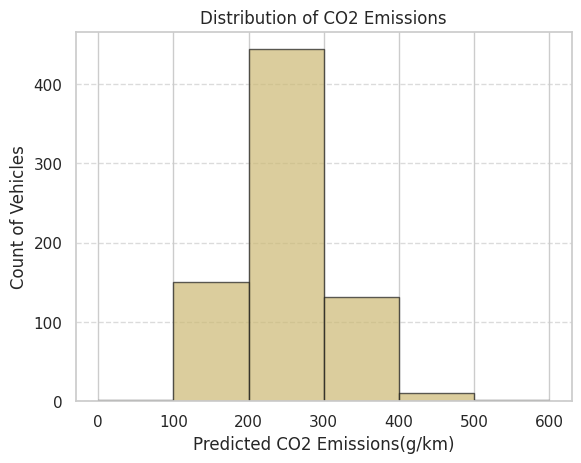

In [ ]:
CO2_emissions= NEW_data['predicted_CO2_emissions']

bins = [0, 100, 200, 300, 400, 500, 600]

# Creating the histogram
plt.hist(CO2_emissions, bins=bins, edgecolor='k', color='y', alpha=0.7)

plt.xlabel('Predicted CO2 Emissions(g/km)')
plt.ylabel('Count of Vehicles')
plt.title('Distribution of CO2 Emissions')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()